In [1]:
import tde_analysis as td
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [2]:
import os
from early_tde_classification.config import Config

feat_path = os.path.join(Config.OUT_FEATURES_DIR, 'features_all.csv')
data, features = td.get_data(feat_path, cuts=True)
y = np.where(data['type']=='TDE', 1, 0)
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(features),
                                                    y, test_size=0.3, random_state=5)
clf = RandomForestClassifier(min_samples_leaf=.1, random_state=3, class_weight="balanced")
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=0.1,
                       random_state=3)

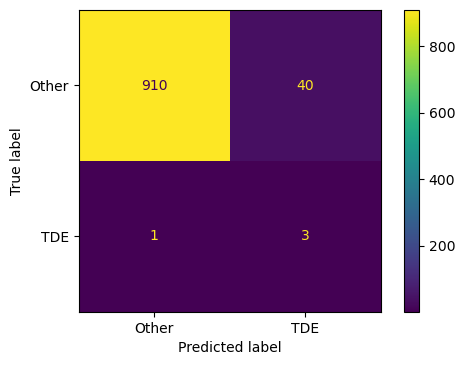

In [3]:
cm = confusion_matrix(y_test, clf.predict(X_test)) #, normalize='pred'

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Other', 'TDE']).plot()

In [6]:
print('Objects classified as TDEs:')
guess_TDE = data.iloc[(X_test[clf.predict(X_test)==1]).index]
guess_TDE.to_csv('tde_candidates.csv')

Objects classified as TDEs:


In [101]:
print('Very good candidates (sharp cut):')
guess_TDE[guess_TDE['rise_time'] > 4]

Very good candidates (sharp cut):


,objId,alertId,type,nb_points,norm,ref_time,amplitude,rise_time,temperature,r_chisq,...,err_rise_time,err_temperature,std_flux_g,std_flux_r,std_snr_g,std_snr_r,sigmoid_dist,snr_rise_time,snr_amplitude,data_origin
304,ZTF20abfcszi,ZTF20abfcszi-51,TDE,51.0,5009.352577,5.904035e+04,2.644240,17.451186,10829.352770,0.613425,...,2.057831,429.616898,0.218163,0.184846,4.415451,4.256497,1.379186,8.480378,8.988657,tdes_ztf
307,ZTF20acqoiyt,ZTF20acqoiyt-17,TDE,17.0,9308.660687,5.917571e+04,2.144322,5.065390,11879.451817,3.084463,...,0.496416,1019.075529,0.331158,0.201444,4.727574,2.159760,4.224956,10.203929,7.900369,tdes_ztf
51,ZTF18abuktbs,1271319540215015003,Unknown,12.0,8080.368019,2.459022e+06,3.188354,13.437267,17672.350939,20.023393,...,2.732860,6068.916778,0.275567,0.216094,4.527316,2.797817,4.986562,4.916925,1.574664,extragal
177,ZTF20abgoocl,1270249613515015010,Unknown,18.0,4647.140273,2.459026e+06,2.313006,4.185055,11960.126715,0.404403,...,0.729793,886.989873,0.242633,0.239550,2.814705,4.087581,7.480637,5.734576,8.453981,extragal
112,ZTF20ablnjvp,1290230744115015000,SN candidate,9.0,7461.695617,2.459049e+06,3.208086,4.034098,13526.455580,0.034044,...,0.522716,1609.539389,0.285206,0.256338,3.218616,3.680714,3.647412,7.717573,4.430761,extragal
